In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# yearly files
vehicle_data_2020 = ('Resources/vehicle_type_by_zipcode_2020.csv')
vehicle_data_2021 = ('Resources/vehicle_type_by_zipcode_2021.csv')
vehicle_data_2022 = ('Resources/vehicle_type_by_zipcode_2022.csv')

#census data
census_data = ('Resources/census_data.csv')

# reading each file
data_2020 = pd.read_csv(vehicle_data_2020, low_memory=False)
data_2021 = pd.read_csv(vehicle_data_2021, low_memory=False)
data_2022 = pd.read_csv(vehicle_data_2022, low_memory=False)
county_data = pd.read_csv(census_data)

# adding a year column
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022

# Concatenate the DataFrames
merged_data = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)

# resetting the index of the DataFrame
merged_data.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
print(merged_data)


merged_data.head()

             Date Zip Code Model Year              Fuel       Make   Duty  \
0        1/1/2020    90001       2007          Gasoline      ACURA  Light   
1        1/1/2020    90002       2007          Gasoline      ACURA  Light   
2        1/1/2020    90003       2007          Gasoline      ACURA  Light   
3        1/1/2020    90004       2007          Gasoline      ACURA  Light   
4        1/1/2020    90006       2007          Gasoline      ACURA  Light   
...           ...      ...        ...               ...        ...    ...   
2002823  1/1/2022      OOS      <2008         Flex-Fuel   CHRYSLER  Light   
2002824  1/1/2022      OOS      <2008         Flex-Fuel   CHRYSLER    Unk   
2002825  1/1/2022      OOS      <2008         Flex-Fuel      MAZDA  Light   
2002826  1/1/2022      OOS      <2008         Flex-Fuel    MERCURY  Light   
2002827  1/1/2022      OOS      <2008  Battery Electric  OTHER/UNK  Light   

         Vehicles  Year  
0              15  2020  
1              20  2020

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Year
0,1/1/2020,90001,2007,Gasoline,ACURA,Light,15,2020
1,1/1/2020,90002,2007,Gasoline,ACURA,Light,20,2020
2,1/1/2020,90003,2007,Gasoline,ACURA,Light,29,2020
3,1/1/2020,90004,2007,Gasoline,ACURA,Light,19,2020
4,1/1/2020,90006,2007,Gasoline,ACURA,Light,15,2020


In [2]:
records_count = len(merged_data)
records_count

2002828

In [3]:
fuel_types = merged_data['Fuel'].unique()

# Print the unique fuel types in this set
print("Fuel types:", fuel_types)

Fuel types: ['Gasoline' 'Natural Gas' 'Diesel and Diesel Hybrid' 'Flex-Fuel'
 'Hybrid Gasoline' 'Other' 'Battery Electric' 'Hydrogen Fuel Cell'
 'Plug-in Hybrid']


In [4]:
# Dropping the columns for model year, make, and duty
merged_data.drop(['Model Year', 'Make', 'Duty'], axis=1, inplace=True)
merged_data.rename(columns={'Zip Code': 'Zipcode'}, inplace=True)
merged_data.head()

,Date,Zipcode,Fuel,Vehicles,Year
0,1/1/2020,90001,Gasoline,15,2020
1,1/1/2020,90002,Gasoline,20,2020
2,1/1/2020,90003,Gasoline,29,2020
3,1/1/2020,90004,Gasoline,19,2020
4,1/1/2020,90006,Gasoline,15,2020


In [5]:
# saving the merged data to a new csv, after the dropped fields
merged_data.to_csv('Resources/merged_data_modified.csv', index=False)

In [6]:
# merging the vehicle data to the zip and county data 
census_data = ('Resources/census_data.csv')
vehicle_data_updt = ('Resources/merged_data_modified.csv')

# reading each file
county_data = pd.read_csv(census_data, dtype={
    'Zipcode': 'object',
    'county': 'object'})
all_vehicle_data = pd.read_csv(vehicle_data_updt, low_memory=False)

In [8]:
county_data.drop(['Population', 'Household Income', 'state_fips', 'state', 'state_abbr', 'city', 'Year'], axis=1, inplace=True)
county_data.head()

,Zipcode,county
0,90001,Los Angeles
1,90001,Los Angeles
2,90001,Los Angeles
3,90001,Los Angeles
4,90001,Los Angeles


In [9]:
# Merge the dataframes on the 'Zip Code' column
merged_data_all = pd.merge(all_vehicle_data, county_data, on='Zipcode', how='left')

# Display the merged dataframe
merged_data_all.head()
merged_data_all

,Date,Zipcode,Fuel,Vehicles,Year,county
0,1/1/2020,90001,Gasoline,15,2020,Los Angeles
1,1/1/2020,90001,Gasoline,15,2020,Los Angeles
2,1/1/2020,90001,Gasoline,15,2020,Los Angeles
3,1/1/2020,90001,Gasoline,15,2020,Los Angeles
4,1/1/2020,90001,Gasoline,15,2020,Los Angeles
...,...,...,...,...,...,...
8762195,1/1/2022,OOS,Flex-Fuel,24,2022,NaN
8762196,1/1/2022,OOS,Flex-Fuel,26,2022,NaN
8762197,1/1/2022,OOS,Flex-Fuel,14,2022,NaN
8762198,1/1/2022,OOS,Flex-Fuel,20,2022,NaN


In [10]:
print(merged_data_all['Year'].unique())

[2020 2021 2022]


In [11]:
desired_county = 'Alameda'
desired_year = 2022

# filtering dataframe for the desired county and year
county_year_data = merged_data_all.loc[(merged_data_all['county'] == desired_county) & (merged_data_all['Year'] == desired_year)]
county_year_data

,Date,Zipcode,Fuel,Vehicles,Year,county
7676193,1/1/2022,94501,Gasoline,4,2022,Alameda
7676194,1/1/2022,94501,Gasoline,4,2022,Alameda
7676195,1/1/2022,94501,Gasoline,4,2022,Alameda
7676196,1/1/2022,94501,Gasoline,4,2022,Alameda
7676197,1/1/2022,94501,Gasoline,4,2022,Alameda
...,...,...,...,...,...,...
7911785,1/1/2022,94710,Flex-Fuel,10,2022,Alameda
7911786,1/1/2022,94710,Flex-Fuel,10,2022,Alameda
7911787,1/1/2022,94710,Flex-Fuel,10,2022,Alameda
7911788,1/1/2022,94710,Flex-Fuel,10,2022,Alameda


In [12]:
# getting all the data for 2020 with counties
fuel_types_2020 = merged_data_all[merged_data_all['Year'] == 2020]
fuel_types_2020 = fuel_types_2020.groupby(['county','Fuel', 'Year']).agg({'Vehicles': 'count'}).reset_index()
fuel_types_2020

,county,Fuel,Year,Vehicles
0,Alameda,Battery Electric,2020,4340
1,Alameda,Diesel and Diesel Hybrid,2020,9545
2,Alameda,Flex-Fuel,2020,8605
3,Alameda,Gasoline,2020,63240
4,Alameda,Hybrid Gasoline,2020,9220
...,...,...,...,...
480,Yuba,Gasoline,2020,3890
481,Yuba,Hybrid Gasoline,2020,595
482,Yuba,Natural Gas,2020,45
483,Yuba,Other,2020,50


In [13]:
total_vehicle_counts_2020 = fuel_types_2020.groupby('Fuel')['Vehicles'].sum().reset_index()

total_vehicle_counts_2020

,Fuel,Vehicles
0,Battery Electric,76020
1,Diesel and Diesel Hybrid,295075
2,Flex-Fuel,259780
3,Gasoline,1586575
4,Hybrid Gasoline,201905
5,Hydrogen Fuel Cell,8415
6,Natural Gas,26260
7,Other,7770
8,Plug-in Hybrid,79645


In [14]:
# getting all the data for 2020 with counties
fuel_types_2021 = merged_data_all[merged_data_all['Year'] == 2021]
fuel_types_2021 = fuel_types_2021.groupby(['county','Fuel', 'Year']).agg({'Vehicles': 'count'}).reset_index()
fuel_types_2021

,county,Fuel,Year,Vehicles
0,Alameda,Battery Electric,2021,4750
1,Alameda,Diesel and Diesel Hybrid,2021,10885
2,Alameda,Flex-Fuel,2021,11575
3,Alameda,Gasoline,2021,68650
4,Alameda,Hybrid Gasoline,2021,9680
...,...,...,...,...
480,Yuba,Hybrid Gasoline,2021,625
481,Yuba,Hydrogen Fuel Cell,2021,10
482,Yuba,Natural Gas,2021,15
483,Yuba,Other,2021,145


In [15]:
total_vehicle_counts_2021 = fuel_types_2021.groupby('Fuel')['Vehicles'].sum().reset_index()

total_vehicle_counts_2021

,Fuel,Vehicles
0,Battery Electric,85820
1,Diesel and Diesel Hybrid,331395
2,Flex-Fuel,339580
3,Gasoline,1713775
4,Hybrid Gasoline,211950
5,Hydrogen Fuel Cell,10490
6,Natural Gas,16750
7,Other,47445
8,Plug-in Hybrid,96090


In [16]:
fuel_types_2022 = merged_data_all[merged_data_all['Year'] == 2022]
fuel_types_2022 = fuel_types_2022.groupby(['county','Fuel', 'Year']).agg({'Vehicles': 'count'}).reset_index()
fuel_types_2022

,county,Fuel,Year,Vehicles
0,Alameda,Battery Electric,2022,5580
1,Alameda,Diesel and Diesel Hybrid,2022,11955
2,Alameda,Flex-Fuel,2022,11975
3,Alameda,Gasoline,2022,72800
4,Alameda,Hybrid Gasoline,2022,10625
...,...,...,...,...
486,Yuba,Gasoline,2022,4610
487,Yuba,Hybrid Gasoline,2022,690
488,Yuba,Natural Gas,2022,45
489,Yuba,Other,2022,25


In [17]:
total_vehicle_counts_2022 = fuel_types_2022.groupby('Fuel')['Vehicles'].sum().reset_index()

total_vehicle_counts_2022

,Fuel,Vehicles
0,Battery Electric,106290
1,Diesel and Diesel Hybrid,367745
2,Flex-Fuel,350785
3,Gasoline,1834675
4,Hybrid Gasoline,235670
5,Hydrogen Fuel Cell,13705
6,Natural Gas,29005
7,Other,6280
8,Plug-in Hybrid,110320


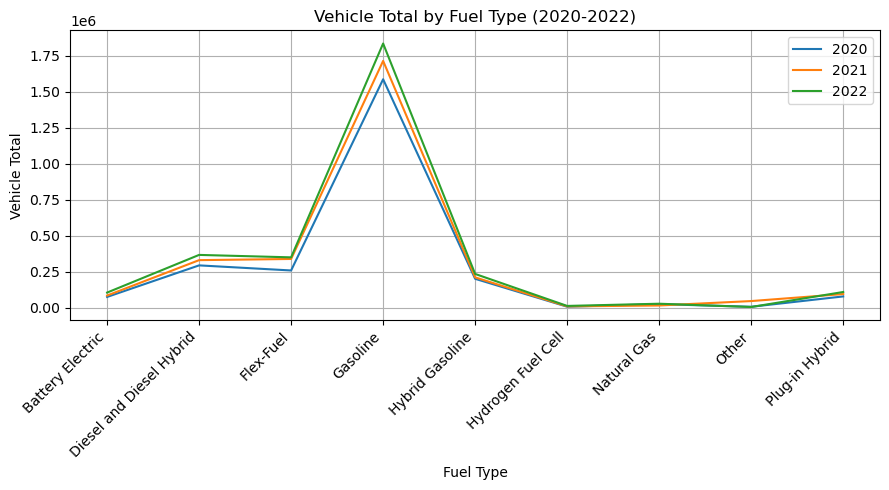

In [18]:
# Data for 2020
fuel_types_2020 = {
    'Battery Electric': 76020,
    'Diesel and Diesel Hybrid': 295075,
    'Flex-Fuel': 259780,
    'Gasoline': 1586575,
    'Hybrid Gasoline': 201905,
    'Hydrogen Fuel Cell': 8415,
    'Natural Gas': 26260,
    'Other': 7770,
    'Plug-in Hybrid': 79645
}

# Data for 2021
fuel_types_2021 = {
    'Battery Electric': 85820,
    'Diesel and Diesel Hybrid': 331395,
    'Flex-Fuel': 339580,
    'Gasoline': 1713775,
    'Hybrid Gasoline': 211950,
    'Hydrogen Fuel Cell': 10490,
    'Natural Gas': 16750,
    'Other': 47445,
    'Plug-in Hybrid': 96090
}

# Data for 2022
fuel_types_2022 = {
    'Battery Electric': 106290,
    'Diesel and Diesel Hybrid': 367745,
    'Flex-Fuel': 350785,
    'Gasoline': 1834675,
    'Hybrid Gasoline': 235670,
    'Hydrogen Fuel Cell': 13705,
    'Natural Gas': 29005,
    'Other': 6280,
    'Plug-in Hybrid': 110320
}

# Extract fuel types and vehicle totals
fuel_types = list(fuel_types_2020.keys())
vehicles_2020 = list(fuel_types_2020.values())
vehicles_2021 = list(fuel_types_2021.values())
vehicles_2022 = list(fuel_types_2022.values())

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(fuel_types, vehicles_2020, label='2020')
plt.plot(fuel_types, vehicles_2021, label='2021')
plt.plot(fuel_types, vehicles_2022, label='2022')

# Customizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Vehicle Total')
plt.title('Vehicle Total by Fuel Type (2020-2022)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [19]:
battery_electric_data = merged_data_all[merged_data_all['Fuel'] == 'Battery Electric']
#battery_electric_data = battery_electric_data.drop_duplicates()
battery_electric_data

,Date,Zipcode,Fuel,Vehicles,Year,county
94987,1/1/2020,92220,Battery Electric,1,2020,Riverside
94988,1/1/2020,92220,Battery Electric,1,2020,Riverside
94989,1/1/2020,92220,Battery Electric,1,2020,Riverside
94990,1/1/2020,92220,Battery Electric,1,2020,Riverside
94991,1/1/2020,92220,Battery Electric,1,2020,Riverside
...,...,...,...,...,...,...
8762058,1/1/2022,OOS,Battery Electric,17,2022,NaN
8762059,1/1/2022,OOS,Battery Electric,22,2022,NaN
8762060,1/1/2022,OOS,Battery Electric,14,2022,NaN
8762061,1/1/2022,OOS,Battery Electric,278,2022,NaN


In [20]:
# filtering the DataFrame by 'Zip Code' to calculate the sum of 'Vehicles' for each zip code
battery_electric_totals = battery_electric_data.groupby(['county','Fuel', 'Year']).agg({'Vehicles': 'count'}).reset_index()

battery_electric_totals


,county,Fuel,Year,Vehicles
0,Alameda,Battery Electric,2020,4340
1,Alameda,Battery Electric,2021,4750
2,Alameda,Battery Electric,2022,5580
3,Alpine,Battery Electric,2020,5
4,Alpine,Battery Electric,2021,15
...,...,...,...,...
165,Yolo,Battery Electric,2021,615
166,Yolo,Battery Electric,2022,765
167,Yuba,Battery Electric,2020,150
168,Yuba,Battery Electric,2021,160


In [21]:
# dropping two counties: Sierra and Modoc, total counties will be 56

# filtering the DataFrame by ‘Zip Code’ to calculate the sum of ‘Vehicles’ for each zip code
battery_electric_totals = battery_electric_data.groupby(['county','Fuel', 'Year']).agg({'Vehicles': 'count'}).reset_index()
# We also need to drop any counties where we don’t have all three years of data...
# To do that, we want to find a list of counties
keepcounty = battery_electric_totals.groupby('county').count()
keepcounty = keepcounty.loc[keepcounty['Fuel'] == 3]
# Now we can delete any rows from multi_census_pd
# Where the Zipcode is not in the ‘keepzip’ file
battery_electric_totals = battery_electric_totals[battery_electric_totals['county'].isin(keepcounty.index)]
# totals for each zip code
battery_electric_totals

,county,Fuel,Year,Vehicles
0,Alameda,Battery Electric,2020,4340
1,Alameda,Battery Electric,2021,4750
2,Alameda,Battery Electric,2022,5580
3,Alpine,Battery Electric,2020,5
4,Alpine,Battery Electric,2021,15
...,...,...,...,...
165,Yolo,Battery Electric,2021,615
166,Yolo,Battery Electric,2022,765
167,Yuba,Battery Electric,2020,150
168,Yuba,Battery Electric,2021,160


In [22]:
# saving the merged data to a new csv, after the dropped fields
battery_electric_totals.to_csv('Resources/battery_electric_totals.csv', index=False)

In [23]:
num_counties = battery_electric_totals['county'].nunique()
num_counties

56

BAR CHART FOR NUMBER OF EV PER COUNTY AND YEAR

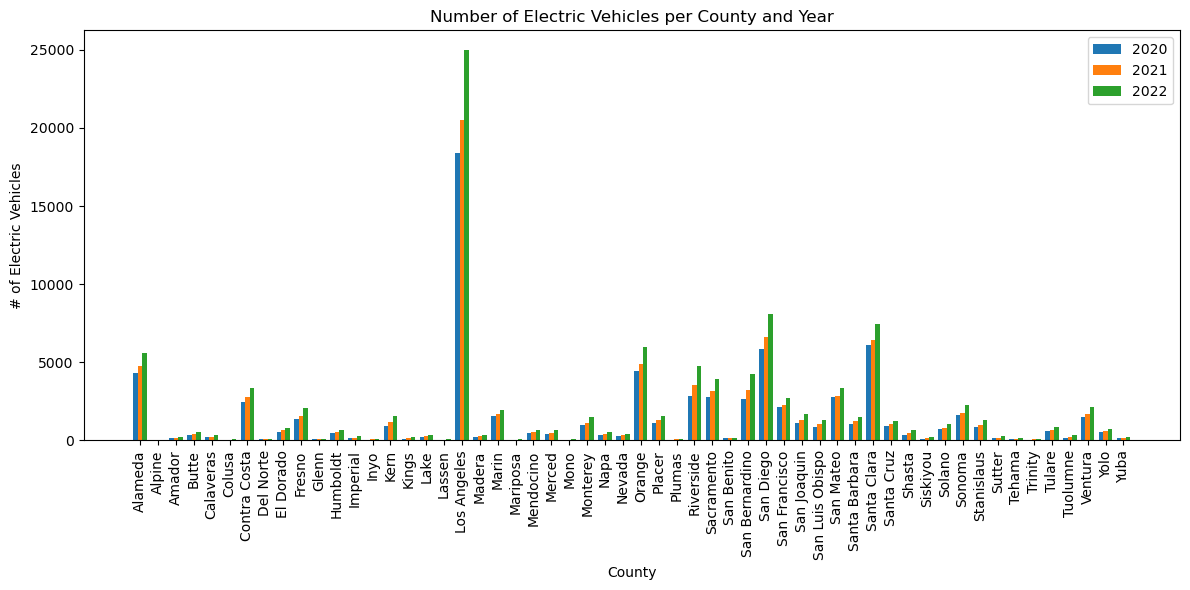

In [24]:
pivot_df = battery_electric_totals.pivot(index='county', columns='Year', values='Vehicles')

# Plotting
plt.figure(figsize=(12, 6))

# Define x positions for bars
x = np.arange(len(pivot_df.index))

# Width of each bar
width = 0.25

# Plot bars for each year
plt.bar(x - width, pivot_df[2020], width, label='2020')
plt.bar(x, pivot_df[2021], width, label='2021')
plt.bar(x + width, pivot_df[2022], width, label='2022')

# Add labels and title
plt.xlabel('County')
plt.ylabel('# of Electric Vehicles')
plt.title('Number of Electric Vehicles per County and Year')
plt.xticks(x, pivot_df.index, rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Calculate the percentage increase from 2020 to 2021
increase_2021 = ((pivot_df[2021] - pivot_df[2020]) / pivot_df[2020]) * 100

# Calculate the percentage increase from 2021 to 2022
increase_2022 = ((pivot_df[2022] - pivot_df[2021]) / pivot_df[2021]) * 100

# Combine the increase rates into a DataFrame
increase_rates = pd.DataFrame({'Increase Rate 2021': increase_2021, 'Increase Rate 2022': increase_2022})

# Display the increase rates
print("Increase Rates:")
increase_rates


Increase Rates:


,Increase Rate 2021,Increase Rate 2022
county,,
Alameda,9.447005,17.473684
Alpine,200.000000,100.000000
Amador,42.307692,27.027027
Butte,17.808219,27.906977
Calaveras,13.636364,40.000000
Colusa,100.000000,83.333333
Contra Costa,14.579055,20.788530
Del Norte,17.647059,10.000000
El Dorado,22.321429,15.328467


In [26]:
total_by_year = battery_electric_totals.groupby('Year')['Vehicles'].sum()

# Display the total number of battery electric vehicles for each year
total_by_year

Year
2020     76020
2021     85820
2022    106275
Name: Vehicles, dtype: int64